<a href="https://colab.research.google.com/github/JackyPro/AI_Course/blob/main/Day2/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.設定：複製一份程式到自己的雲端上，並且開啟副本

<table>
  <tr>
    <td bgcolor=#ccffcc>
      <center><img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/1.png" width=70%>
      </center>
      <center><font size="6">Step 1<br /><br /></font></center> 
    </td>
  </tr>
  <tr>
    <td bgcolor=#D1EEEE>
      <center>
        <img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/2.png" width=70%>
      </center>
      <center>
        <font size="6">Step 2<br /><br /></font>
        <font size="4">確認是否為副本<br />
        若為副本，代表程式檔已經複製在自己的雲端<br />
        可以自行修改檔名<br /><br /></font>
      </center> 
    </td>
  </tr>
  <tr>
    <td bgcolor=#ffffcc>
      <center><img src="https://github.com/JackyPro/DL_imageclassification/raw/a26c0994e0caf0eac7fb219cdd95f235ded65cc4/img/3.png" width=70%>
      </center>
      <center><font size="6">Step 3<br /><br /></font></center> 
    </td>
  </tr>
</table>



# 2.Envs

In [ ]:
from tensorflow.python.client import device_lib
print (device_lib.list_local_devices())

In [ ]:
import platform
import tensorflow
import tensorflow.keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(tensorflow.keras.__version__))

In [ ]:
!python -V
platform.python_version()

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Task1: multi-class classification with sklearn dataset - digits  
Logistic Regression model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

## Load dataset

In [ ]:
digits = datasets.load_digits()#导入digits数据集

In [ ]:
digits.keys()#查看digits中有哪些属性

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

## view raw images

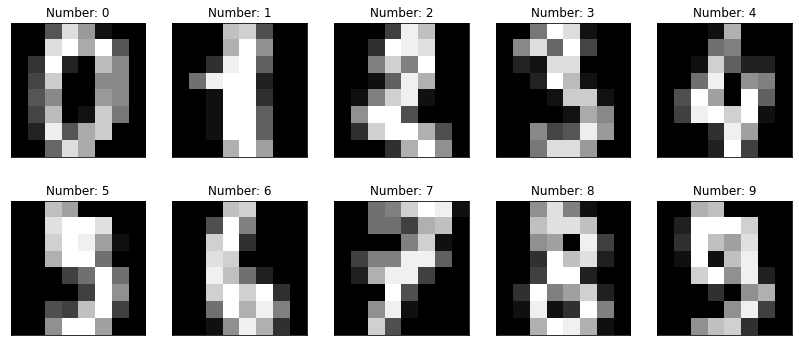

In [ ]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
n_size = 2
#plt.figure(figsize=(n_size*n_size*num_cols, n_size*num_rows))
plt.figure(figsize=(14, 6))
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(digits.images[i], cmap='gray', interpolation=None)
    plt.title("{} {}".format( str("Number:"), digits.target[i] ),color = 'black')
plt.show()

In [ ]:
x = digits.data   ##获得数据集中的输入
y = digits.target ##获得数据集中的输出，即标签(也就是类别)

## data splitting(8:2)

In [ ]:
# Splitting data into 80% training and 20% test data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1, stratify=y)

## Std

In [ ]:
# Standardizing the features
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

## Training

In [ ]:
lr1 = LogisticRegression(
                            C = 1.0,
                            max_iter=100,
                            multi_class='multinomial',
                            solver='sag',
                            verbose = 100,
                            n_jobs = None)
lr1.fit(x_train_std, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
max_iter reached after 1 seconds
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


C:\Users\user\anaconda3\envs\tf2.1\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(multi_class='multinomial', solver='sag', verbose=100)

## Predict

In [ ]:
y_pred = lr1.predict(x_test_std)

In [ ]:
y_pred_proba = lr1.predict_proba(x_test_std)

### Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('accuracy score: ', accuracy_score(y_test, y_pred).round(3))

accuracy score:  0.972


### Confusion Matrix

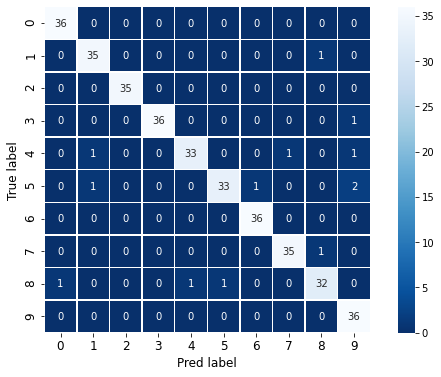

In [ ]:
cm = confusion_matrix(y_test, y_pred)
#print(cm)

target_names = np.arange(0, 10, 1)
conf_m = pd.DataFrame(
                        cm,
                        index = target_names,
                        columns = target_names
                        )
fig, ax = plt.subplots(figsize = (10, 6))

sns.heatmap(
            conf_m, annot=True, annot_kws={"size": 10},
            cmap='Blues_r',
            fmt='g', linewidth=0.5, square=True
            )
plt.ylabel('True label', fontsize=12)
plt.xlabel('Pred label', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
#plt.savefig('cm.png', bbox_inches='tight')
plt.show()

### other metrics

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       0.97      0.92      0.94        36
           5       0.97      0.89      0.93        37
           6       0.97      1.00      0.99        36
           7       0.97      0.97      0.97        36
           8       0.94      0.91      0.93        35
           9       0.90      1.00      0.95        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



### Take a view - testing image (a few)

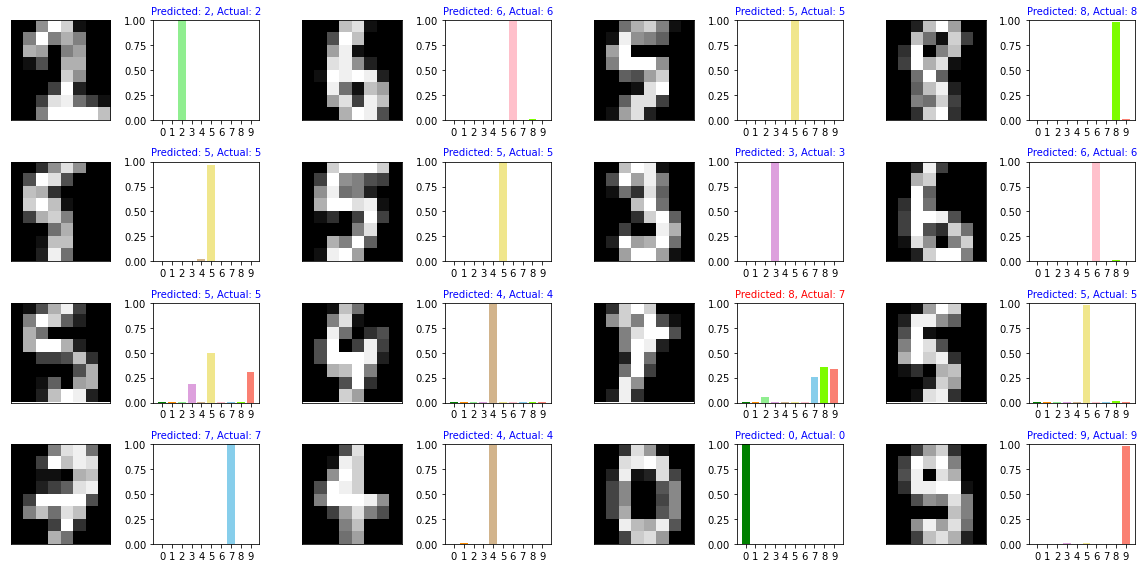

In [ ]:
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
n_size = 2
plt.figure(figsize=(n_size*n_size*num_cols, (n_size)*num_rows))
#plt.figure(figsize=(14, 6))
for i in range(0, num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(x_test[i], (8, 8)), cmap='gray', interpolation=None)
    
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plt.xticks(range(0, 10, 1))
    plt.ylim(0, 1)
    plt.bar( 
                range(0, 10, 1),
                y_pred_proba[i],
                color = ['g','darkorange','lightgreen','plum', 'tan',
                        'khaki', 'pink', 'skyblue','lawngreen','salmon'] 
            )
    if y_pred[i] == y_test[i]:
        color = 'blue'
    else:
        color = 'red'
    plt.title(
                'Predicted: {}, Actual: {}'.format(y_pred[i], y_test[i]), 
                fontsize = 10, 
                color = color
             )
plt.tight_layout()
plt.show()

### Take a view - testing image (mistake)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
    
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1   

Real:  5
Predict:  5


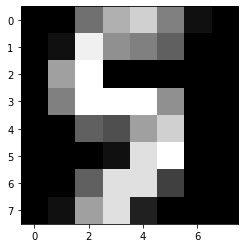

In [ ]:
i = 2
plt.imshow(np.reshape( x_test[i], (8, 8)), cmap='gray', interpolation=None)
print('Real: ', y_test[i])
print('Predict: ', y_pred[i])

In [ ]:
print(len(misclassifiedIndexes))
misclassifiedIndexes[0:5]

13


[10, 44, 47, 71, 111]

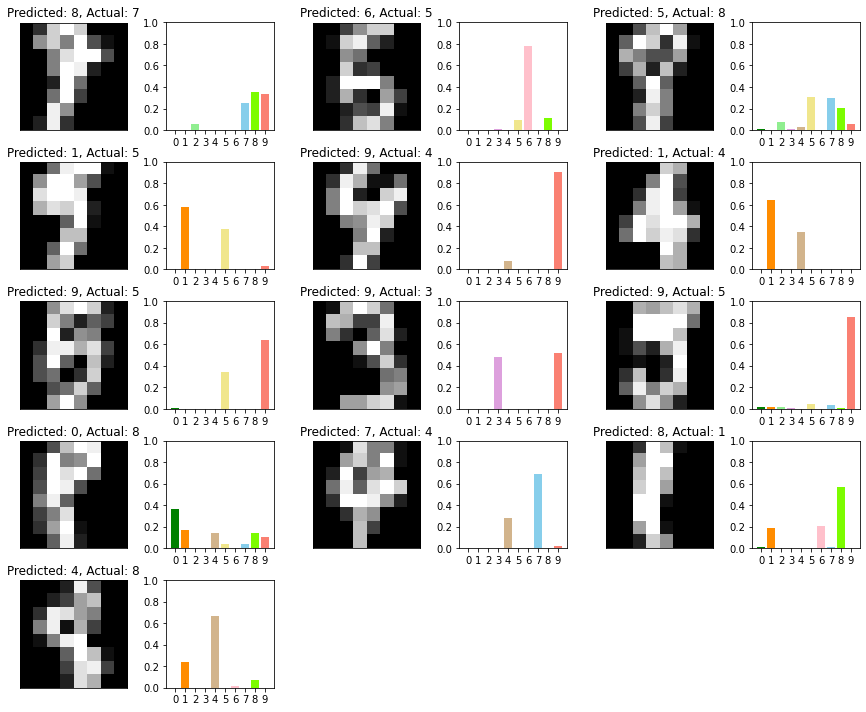

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
n_size = 2
plt.figure(figsize=(n_size*n_size*num_cols, n_size *num_rows))
#plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:num_images]):
    #plt.subplot(1, 5, plotIndex + 1)
    plt.subplot(num_rows, 2*num_cols, 2*plotIndex+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(x_test[badIndex], (8, 8)), cmap='gray', interpolation=None)
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex],y_test[badIndex]), fontsize = 12)
    
    plt.subplot(num_rows, 2*num_cols, 2*plotIndex+2)
    plt.xticks(range(0, 10, 1))
    plt.ylim(0, 1)
    plt.bar( 
                range(0, 10, 1),
                y_pred_proba[badIndex],
                color = ['g','darkorange','lightgreen','plum', 'tan',
                        'khaki', 'pink', 'skyblue','lawngreen','salmon']  
            )
plt.tight_layout()
plt.show()

---

# Task2: multi-class classification with Mnist

## Load dataset

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
mnist.data.shape

(70000, 784)

In [ ]:
mnist['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## view raw images

In [ ]:
mnist['data'][0].shape

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

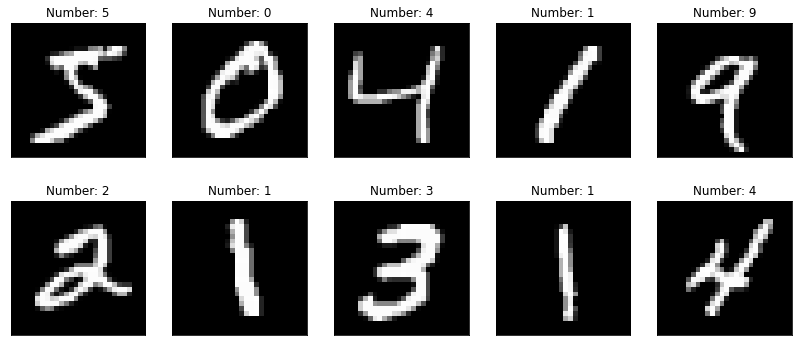

In [ ]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
n_size = 2
#plt.figure(figsize=(n_size*n_size*num_cols, n_size*num_rows))
plt.figure(figsize=(14, 6))
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(mnist['data'][i].reshape(28, 28), cmap='gray', interpolation=None)
    plt.title("{} {}".format( str("Number:"), mnist['target'][i] ),color = 'black')
plt.show()

In [ ]:
x = mnist['data']
y = mnist['target'].astype(int)

## normalization

In [ ]:
x_norm = x/255

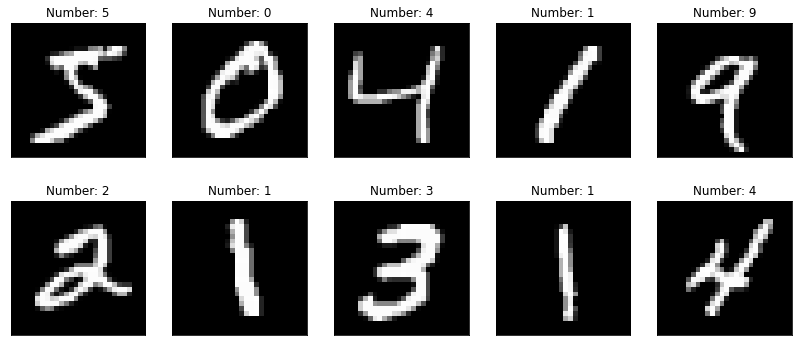

In [ ]:
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols
n_size = 2
#plt.figure(figsize=(n_size*n_size*num_cols, n_size*num_rows))
plt.figure(figsize=(14, 6))
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_norm[i].reshape(28, 28), cmap='gray', interpolation=None)
    plt.title("{} {}".format( str("Number:"), mnist['target'][i] ),color = 'black')
plt.show()

In [ ]:
x_norm[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## data splitting(8:2)

In [ ]:
# Splitting data into 80% training and 20% test data
x_train, x_test, y_train, y_test = train_test_split(
    x_norm, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
#x_, x__, y_, y__ = train_test_split(
#    x, y, test_size=0.9, random_state=1, stratify=y)
#x_train, x_test, y_train, y_test = train_test_split(
#    x_, y_, test_size=0.5, random_state=1, stratify=y_)

In [ ]:
print('x_train: ', x_train.shape)
print('x_train: ', y_train.shape)
print('x_test : ', x_test.shape)
print('y_test : ', y_test.shape)

x_train:  (56000, 784)
x_train:  (56000,)
x_test :  (14000, 784)
y_test :  (14000,)


## Std

In [ ]:
# Standardizing the features
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

## Training

In [ ]:
lr2 = LogisticRegression(
                            C = 1.0,
                            max_iter=50,
                            multi_class='multinomial',
                            solver='newton-cg',
                            verbose = 50,
                            n_jobs = 16)
lr2.fit(x_train_std, y_train)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   1 out of   1 | elapsed:  8.4min finished


LogisticRegression(max_iter=50, multi_class='multinomial', n_jobs=16,
                   solver='newton-cg', verbose=1)

## Predict

In [ ]:
y_pred = lr2.predict(x_test)

In [ ]:
y_pred[0]

3

In [ ]:
y_pred_proba = lr2.predict_proba(x_test_std)

### Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_test, y_pred).round(3))

0.9156428571428571


### Confusion Matrix

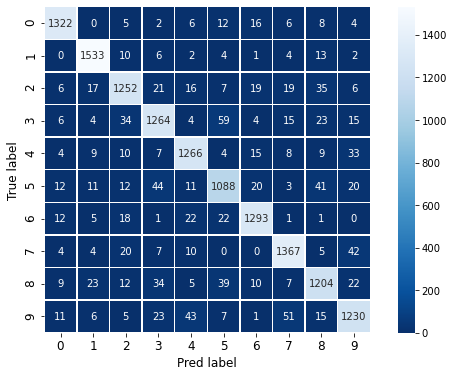

In [ ]:
cm = confusion_matrix(y_test, y_pred)
#print(cm)

target_names = np.arange(0, 10, 1)
conf_m = pd.DataFrame(
                        cm,
                        index = target_names,
                        columns = target_names
                        )
fig, ax = plt.subplots(figsize = (10, 6))

sns.heatmap(
            conf_m, annot=True, annot_kws={"size": 10},
            cmap='Blues_r',
            fmt='g', linewidth=0.5, square=True
            )
plt.ylabel('True label', fontsize=12)
plt.xlabel('Pred label', fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
#plt.savefig('cm.png', bbox_inches='tight')
plt.show()

### other metrics

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1381
           1       0.95      0.97      0.96      1575
           2       0.91      0.90      0.90      1398
           3       0.90      0.89      0.89      1428
           4       0.91      0.93      0.92      1365
           5       0.88      0.86      0.87      1262
           6       0.94      0.94      0.94      1375
           7       0.92      0.94      0.93      1459
           8       0.89      0.88      0.89      1365
           9       0.90      0.88      0.89      1392

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.92      0.92      0.92     14000



### Take a view - testing image (a few)

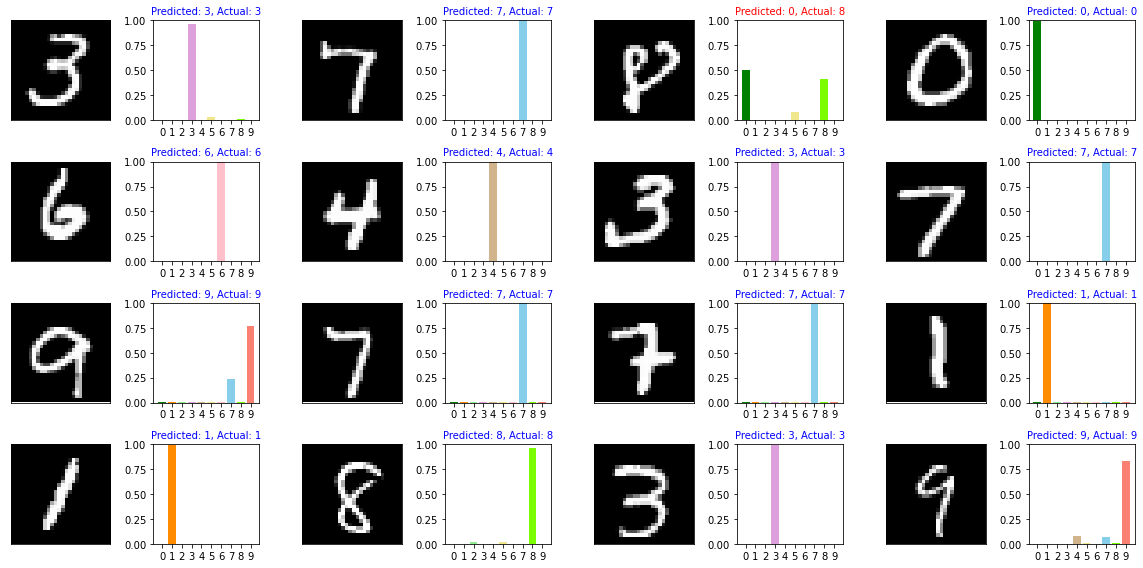

In [ ]:
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
n_size = 2
plt.figure(figsize=(n_size*n_size*num_cols, (n_size)*num_rows))
#plt.figure(figsize=(14, 6))
for i in range(0, num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(x_test[i], (28, 28)), cmap='gray', interpolation=None)
    
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plt.xticks(range(0, 10, 1))
    plt.ylim(0, 1)
    plt.bar( 
                range(0, 10, 1),
                y_pred_proba[i],
                color = ['g','darkorange','lightgreen','plum', 'tan',
                        'khaki', 'pink', 'skyblue','lawngreen','salmon'] 
            )
    if y_pred[i] == y_test[i]:
        color = 'blue'
    else:
        color = 'red'
    plt.title(
                'Predicted: {}, Actual: {}'.format(y_pred[i], y_test[i]), 
                fontsize = 10, 
                color = color
             )
plt.tight_layout()
plt.show()

### Take a view - testing image (mistake)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
    
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1   

In [ ]:
print(len(misclassifiedIndexes))
misclassifiedIndexes[0:5]

1181


[2, 17, 27, 40, 48]

Real:  8
Predict:  0


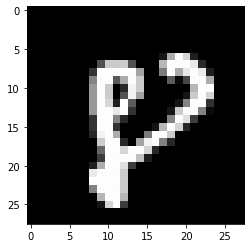

In [ ]:
i = 2
plt.imshow(np.reshape( x_test[i], (28, 28)), cmap='gray', interpolation=None)
print('Real: ', y_test[i])
print('Predict: ', y_pred[i])

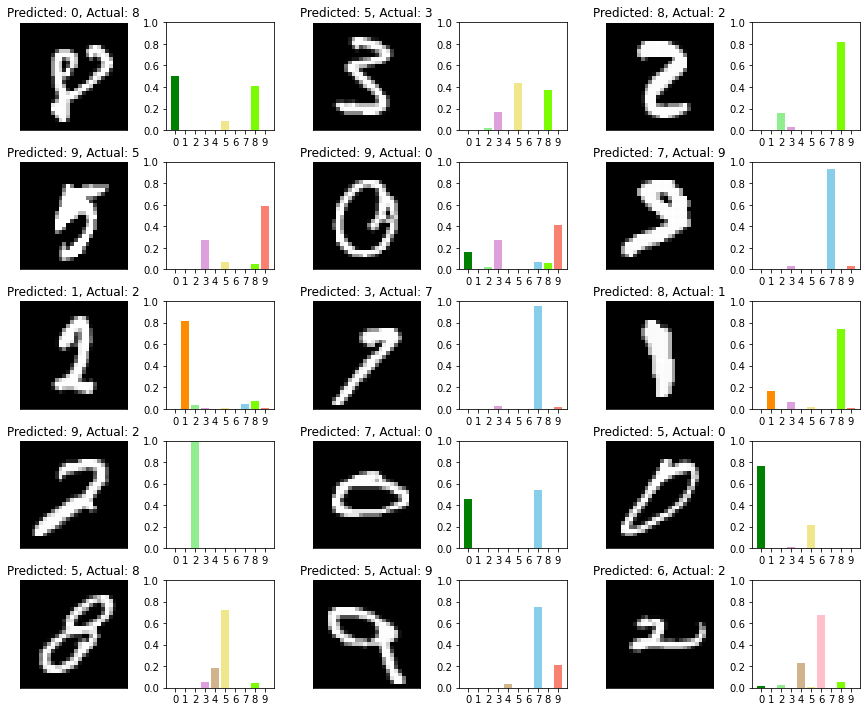

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
n_size = 2
plt.figure(figsize=(n_size*n_size*num_cols, n_size *num_rows))
#plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:num_images]):
    #plt.subplot(1, 5, plotIndex + 1)
    plt.subplot(num_rows, 2*num_cols, 2*plotIndex+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(x_test[badIndex], (28, 28)), cmap='gray', interpolation=None)
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], y_test[badIndex]), fontsize = 12)
    
    plt.subplot(num_rows, 2*num_cols, 2*plotIndex+2)
    plt.xticks(range(0, 10, 1))
    plt.ylim(0, 1)
    plt.bar( 
                range(0, 10, 1),
                y_pred_proba[badIndex],
                color = ['g','darkorange','lightgreen','plum', 'tan',
                        'khaki', 'pink', 'skyblue','lawngreen','salmon']  
            )
plt.tight_layout()
plt.show()

In [ ]:
lr2.coef_.shape

(10, 784)

In [ ]:
lr2.intercept_.shape

(10,)

## Inference

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
image_path = './testing_image.png'
image_shape = (28, 28)

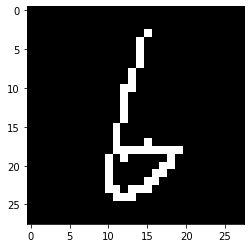

In [ ]:
from PIL import Image
image = Image.open(image_path)
image = image.resize(image_shape)
plt.imshow(image, cmap='gray', interpolation=None)
plt.show()

In [ ]:
image_np = np.array(image)
image_np = image_np/255
image_np = image_np[:,:,0]

In [ ]:
image_np.shape

(28, 28)

In [ ]:
image_np

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

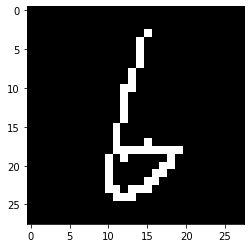

In [ ]:
plt.imshow(image_np, cmap='gray', interpolation=None)
plt.show()

In [ ]:
img_test = np.reshape(image_np,(1, 784))

In [ ]:
img_test.shape

(1, 784)

In [ ]:
y_test_img = lr2.predict(img_test)

ML: It is number : 8


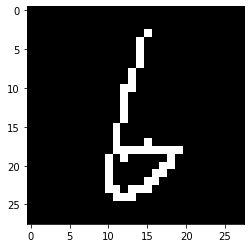

In [ ]:
print('ML: It is number :',y_test_img[0])
plt.imshow(image_np, cmap='gray', interpolation=None)
plt.show()